# PARTE 1 - DADOS DOS JOGOS

In [86]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Função para extrair dados dos jogos de uma temporada específica
def extrair_jogos_nba(temporada_inicio):
    """
    Extrai os dados dos jogos da NBA para a temporada especificada.
    
    Args:
        temporada_inicio (int): Ano de início da temporada. Ex: 2023 para 2023-24.
        
    Returns:
        pandas.DataFrame: Dados dos jogos da temporada.
    """
    # Usando o LeagueGameFinder para buscar os jogos
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=f"{temporada_inicio}-{str(temporada_inicio + 1)[-2:]}")
    
    # Transformar os dados em um DataFrame
    games = gamefinder.get_data_frames()[0]
    return games

# Extração das temporadas 2023-24 e 2024-25
dados_2023_24 = extrair_jogos_nba(2023)
dados_2024_25 = extrair_jogos_nba(2024)

# Concatenar os dados das duas temporadas
dados_nba = pd.concat([dados_2023_24, dados_2024_25])

# Exibir informações gerais
print(f"Número de jogos coletados: {len(dados_nba)}")
print(dados_nba.head())

# Salvar os dados em um arquivo CSV
# dados_nba.to_csv("nba_games_2023_2025.csv", index=False)
# print("Dados salvos em 'nba_games_2023_2025.csv'.")


Número de jogos coletados: 6777
  SEASON_ID     TEAM_ID TEAM_ABBREVIATION         TEAM_NAME     GAME_ID  \
0     42023  1610612738               BOS    Boston Celtics  0042300405   
1     42023  1610612742               DAL  Dallas Mavericks  0042300405   
2     42023  1610612742               DAL  Dallas Mavericks  0042300404   
3     42023  1610612738               BOS    Boston Celtics  0042300404   
4     42023  1610612738               BOS    Boston Celtics  0042300403   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2024-06-17  BOS vs. DAL  W  240  106  ...   0.850    15    36   51   25   
1  2024-06-17    DAL @ BOS  L  240   88  ...   0.538     7    28   35   18   
2  2024-06-14  DAL vs. BOS  W  240  122  ...   0.682    13    39   52   21   
3  2024-06-14    BOS @ DAL  L  239   84  ...   0.923     4    27   31   18   
4  2024-06-12    BOS @ DAL  W  240  106  ...   0.929     6    30   36   26   

   STL  BLK  TOV  PF  PLUS_MINUS  
0    9    2  

In [87]:
dados_nba.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [88]:
variables_dict = {
    "SEASON_ID": "Identificador da temporada (ex.: '22023' para a temporada 2023-2024).",
    "TEAM_ID": "Identificador único do time.",
    "TEAM_ABBREVIATION": "Abreviação do nome do time (ex.: 'CHA' para Charlotte Hornets).",
    "TEAM_NAME": "Nome completo do time (ex.: 'Charlotte Hornets').",
    "GAME_ID": "Identificador único da partida.",
    "GAME_DATE": "Data em que o jogo foi realizado (formato YYYY-MM-DD).",
    "MATCHUP": "Confronto da partida, incluindo local (ex.: 'CHA vs BOS' ou 'CHA @ BOS').",
    "WL": "Resultado do jogo para o time (W = Vitória, L = Derrota).",
    "MIN": "Minutos totais jogados pelo jogador na partida.",
    "PTS": "Pontos marcados pelo jogador na partida.",
    "FGM": "Field Goals Made - Arremessos de quadra convertidos.",
    "FGA": "Field Goals Attempted - Arremessos de quadra tentados.",
    "FG_PCT": "Field Goal Percentage - Porcentagem de acertos nos arremessos de quadra.",
    "FG3M": "3-Point Field Goals Made - Cestas de 3 pontos convertidas.",
    "FG3A": "3-Point Field Goals Attempted - Cestas de 3 pontos tentadas.",
    "FG3_PCT": "3-Point Field Goal Percentage - Porcentagem de acertos nos arremessos de 3 pontos.",
    "FTM": "Free Throws Made - Lances livres convertidos.",
    "FTA": "Free Throws Attempted - Lances livres tentados.",
    "FT_PCT": "Free Throw Percentage - Porcentagem de acertos nos lances livres.",
    "OREB": "Offensive Rebounds - Rebotes ofensivos capturados.",
    "DREB": "Defensive Rebounds - Rebotes defensivos capturados.",
    "REB": "Rebounds - Total de rebotes (ofensivos + defensivos).",
    "AST": "Assists - Total de assistências.",
    "STL": "Steals - Total de roubos de bola.",
    "BLK": "Blocks - Total de bloqueios (tocos).",
    "TOV": "Turnovers - Total de perdas de posse de bola.",
    "PF": "Personal Fouls - Faltas pessoais cometidas.",
    "PLUS_MINUS": "Plus/Minus - Diferença de pontos no placar enquanto o jogador estava em quadra."
}

In [89]:
# Função para extrair jogos de um time em uma temporada específica
def extrair_jogos_time(temporada_inicio, time):
    """
    Extrai os dados dos jogos de um time específico em uma temporada.
    
    Args:
        temporada_inicio (int): Ano de início da temporada. Ex: 2023 para 2023-24.
        time (str): Nome completo do time. Ex: "Charlotte Hornets".
        
    Returns:
        pandas.DataFrame: Dados dos jogos do time na temporada.
    """
    # Usando o LeagueGameFinder para buscar jogos da temporada
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=f"{temporada_inicio}-{str(temporada_inicio + 1)[-2:]}")
    
    # Transformar os dados em um DataFrame
    games = gamefinder.get_data_frames()[0]
    
    # Filtrar jogos do time (casa ou visitante)
    jogos_time = games[
        (games['TEAM_NAME'] == time)
    ]
    return jogos_time

# Nome do time
team_name = "Charlotte Hornets"

# Extração para as temporadas 2023-24 e 2024-25
jogos_2023_24 = extrair_jogos_time(2023, team_name)
jogos_2024_25 = extrair_jogos_time(2024, team_name)

# Concatenar os dados das duas temporadas
jogos_hornets = pd.concat([jogos_2023_24, jogos_2024_25])

# Exibir informações gerais
print(f"Número de jogos coletados para {team_name}: {len(jogos_hornets)}")
print(jogos_hornets.head())

# Salvar os dados em um arquivo CSV
# jogos_hornets.to_csv(f"{team_name.replace(' ', '_').lower()}_games_2023_2025.csv", index=False)
# print(f"Dados salvos em '{team_name.replace(' ', '_').lower()}_games_2023_2025.csv'.")

Número de jogos coletados para Charlotte Hornets: 134
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
193     22023  1610612766               CHA  Charlotte Hornets  0022301187   
233     22023  1610612766               CHA  Charlotte Hornets  0022301173   
265     22023  1610612766               CHA  Charlotte Hornets  0022301159   
284     22023  1610612766               CHA  Charlotte Hornets  0022301144   
320     22023  1610612766               CHA  Charlotte Hornets  0022301135   

      GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
193  2024-04-14    CHA @ CLE  W  241  120  ...   0.818    10    37   47   36   
233  2024-04-12    CHA @ BOS  L  240   98  ...   0.864     4    29   33   20   
265  2024-04-10    CHA @ ATL  W  241  115  ...   0.955     5    28   33   25   
284  2024-04-09  CHA vs. DAL  L  240  104  ...   0.762     8    31   39   24   
320  2024-04-07  CHA vs. OKC  L  241  118  ...   0.786     7    29   36   29 

In [90]:
# 1. Verificar dados ausentes
print("Dados Ausentes:")
print(jogos_hornets.isnull().sum())  # Contagem de valores nulos
print("\n")

Dados Ausentes:
SEASON_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_NAME            0
GAME_ID              0
GAME_DATE            0
MATCHUP              0
WL                   0
MIN                  0
PTS                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PLUS_MINUS           0
dtype: int64




In [91]:
# 2. Verificar valores redundantes (duplicados)
print("Valores Duplicados:")
print(jogos_hornets.duplicated().sum())  # Contagem de linhas duplicadas
print("\n")

Valores Duplicados:
0




In [92]:
# 3. Verificar inconsistências (valores fora do padrão esperado)
print("Resumo Estatístico:")
print(jogos_hornets.describe(include="all"))  # Resumo estatístico de variáveis numéricas e categóricas
print("\n")

Resumo Estatístico:
       SEASON_ID       TEAM_ID TEAM_ABBREVIATION          TEAM_NAME  \
count        134  1.340000e+02               134                134   
unique         4           NaN                 1                  1   
top        22023           NaN               CHA  Charlotte Hornets   
freq          82           NaN               134                134   
mean         NaN  1.610613e+09               NaN                NaN   
std          NaN  0.000000e+00               NaN                NaN   
min          NaN  1.610613e+09               NaN                NaN   
25%          NaN  1.610613e+09               NaN                NaN   
50%          NaN  1.610613e+09               NaN                NaN   
75%          NaN  1.610613e+09               NaN                NaN   
max          NaN  1.610613e+09               NaN                NaN   

           GAME_ID   GAME_DATE      MATCHUP   WL         MIN         PTS  ...  \
count          134         134          134  1

In [93]:
# 4. Detectar valores enviesados (distribuições assimétricas)
numeric_columns = jogos_hornets.select_dtypes(include=[np.number]).columns
print("Skewness (Assimetria das Distribuições):")
print(jogos_hornets[numeric_columns].skew())  # Valores próximos de 0 indicam baixa assimetria
print("\n")

Skewness (Assimetria das Distribuições):
TEAM_ID       0.000000
MIN           4.270744
PTS          -0.119156
FGM          -0.021196
FGA           0.181548
FG_PCT        0.311441
FG3M          0.255469
FG3A          0.330162
FG3_PCT       0.057750
FTM           0.250358
FTA           0.289703
FT_PCT       -0.345313
OREB          0.693253
DREB          0.331719
REB           0.503741
AST           0.203649
STL           0.074345
BLK           0.309685
TOV           0.615480
PF            0.042680
PLUS_MINUS   -0.246433
dtype: float64




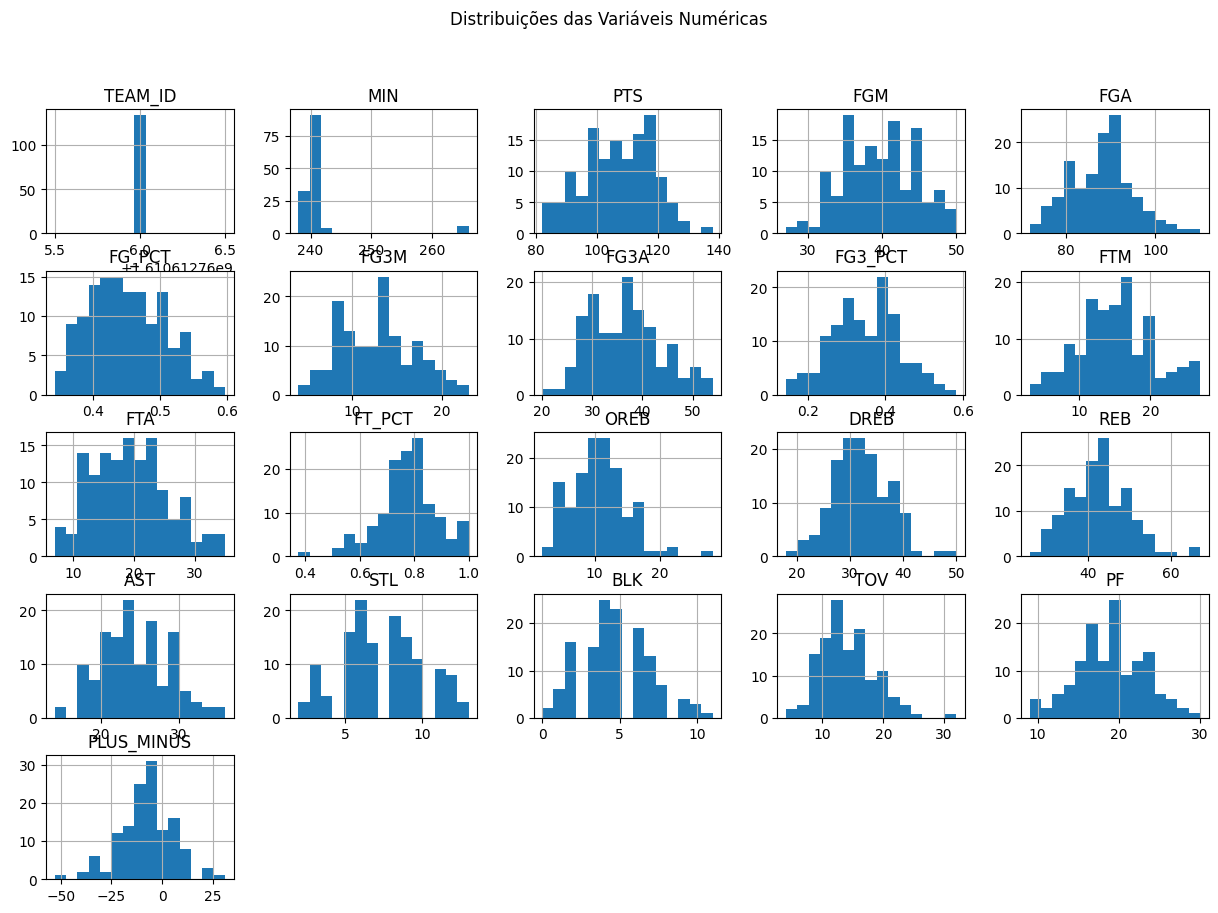

In [94]:
# Visualizar distribuições das variáveis numéricas
jogos_hornets[numeric_columns].hist(figsize=(15, 10), bins=15)
plt.suptitle("Distribuições das Variáveis Numéricas")
plt.show()

In [95]:
# 5. Detectar valores ruidosos e outliers
print("Outliers (utilizando o método IQR):")
for column in numeric_columns:
    Q1 = jogos_hornets[column].quantile(0.25)  # Primeiro quartil
    Q3 = jogos_hornets[column].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = jogos_hornets[(jogos_hornets[column] < lower_bound) | (jogos_hornets[column] > upper_bound)]
    if not outliers.empty:
        print(f"Coluna {column} tem {len(outliers)} outliers.")
print("\n")

Outliers (utilizando o método IQR):
Coluna MIN tem 8 outliers.
Coluna FGA tem 2 outliers.
Coluna FT_PCT tem 3 outliers.
Coluna OREB tem 3 outliers.
Coluna DREB tem 1 outliers.
Coluna REB tem 2 outliers.
Coluna BLK tem 1 outliers.
Coluna TOV tem 1 outliers.
Coluna PLUS_MINUS tem 5 outliers.




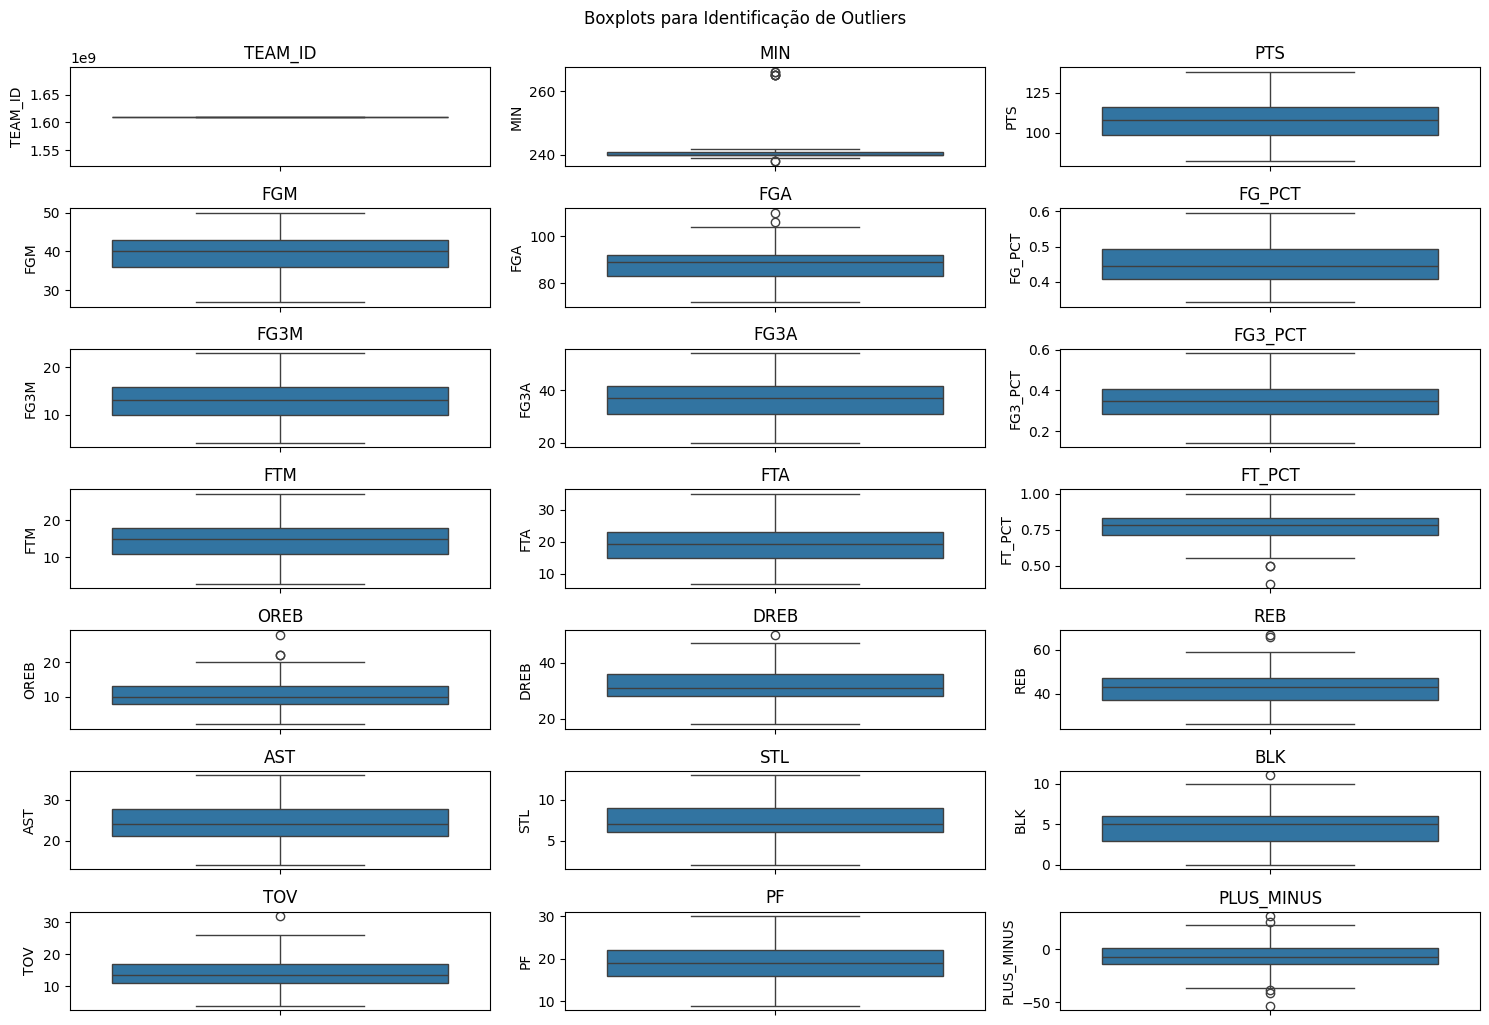

In [96]:
# Visualizar os outliers com boxplots
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for the subplots
num_cols = 3  # Number of columns
num_rows = int(np.ceil(len(numeric_columns) / num_cols)) # Number of rows calculated dynamically

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjusted subplot layout
    sns.boxplot(data=jogos_hornets, y=column)
    plt.title(column)

plt.tight_layout()
plt.suptitle("Boxplots para Identificação de Outliers", y=1.02)
plt.show()

Justificativa: A Coluna como MIN (minutos jogados): Apresenta um valor que pode ser legítimo, pois um jogador pode ter tido tempos de jogo muito altos ou baixos.
FGA, FTA, REB, PLUS_MINUS, etc.: Estes valores extremos podem ocorrer naturalmente em desempenhos excepcionais, então o contexto dos jogos deve ser considerado.

In [97]:
# Imputação de Outliers (ajuste de valores extremos)
# Clamping (limitação): Ajusta os outliers para os limites do intervalo IQR.

# for column in ['MIN', 'FGA', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'BLK', 'TOV', 'PLUS_MINUS']:
#     Q1 = jogos_hornets[column].quantile(0.25)
#     Q3 = jogos_hornets[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     jogos_hornets[column] = np.where(jogos_hornets[column] < lower_bound, lower_bound, jogos_hornets[column])
#     jogos_hornets[column] = np.where(jogos_hornets[column] > upper_bound, upper_bound, jogos_hornets[column])


In [98]:
# 6. Resumo de possíveis problemas
print("Problemas Identificados:")
if jogos_hornets.isnull().values.any():
    print("- Existem dados ausentes.")
if jogos_hornets.duplicated().any():
    print("- Existem dados redundantes (duplicados).")
if not jogos_hornets[numeric_columns].skew().between(-0.5, 0.5).all():
    print("- Existem variáveis com distribuição enviesada.")
print("- Análise de outliers foi realizada (veja os gráficos de boxplot).")

Problemas Identificados:
- Existem variáveis com distribuição enviesada.
- Análise de outliers foi realizada (veja os gráficos de boxplot).


In [99]:
# Transformações Logarítmicas
skewed_columns = ['FGA', 'FTA', 'REB']
for column in skewed_columns:
    jogos_hornets[column] = np.log1p(jogos_hornets[column])  # log(1 + valor)

In [100]:
# Normalização ou Padronização
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
jogos_hornets[numeric_columns] = scaler.fit_transform(jogos_hornets[numeric_columns])

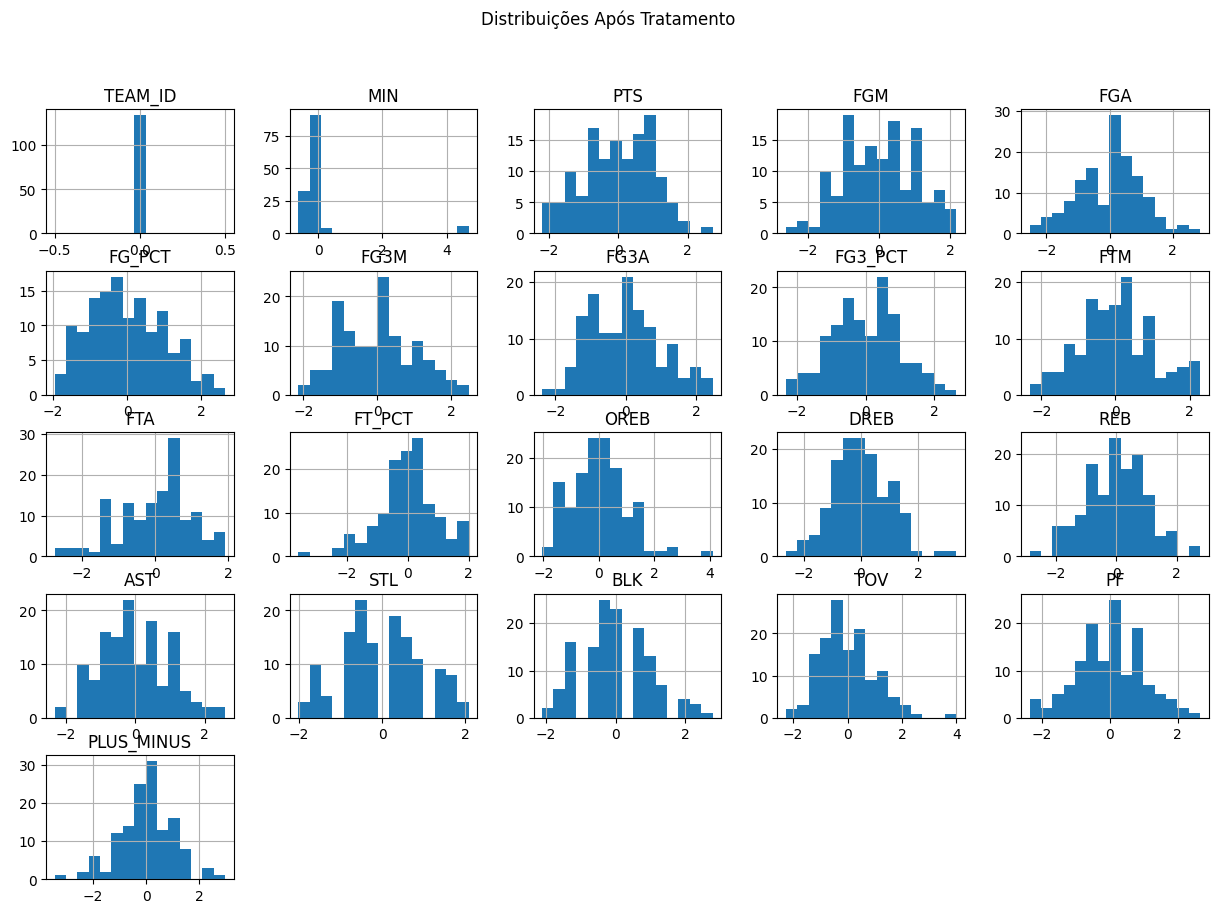

In [101]:
# Histogramas
jogos_hornets[numeric_columns].hist(figsize=(15, 10), bins=15)
plt.suptitle("Distribuições Após Tratamento")
plt.show()

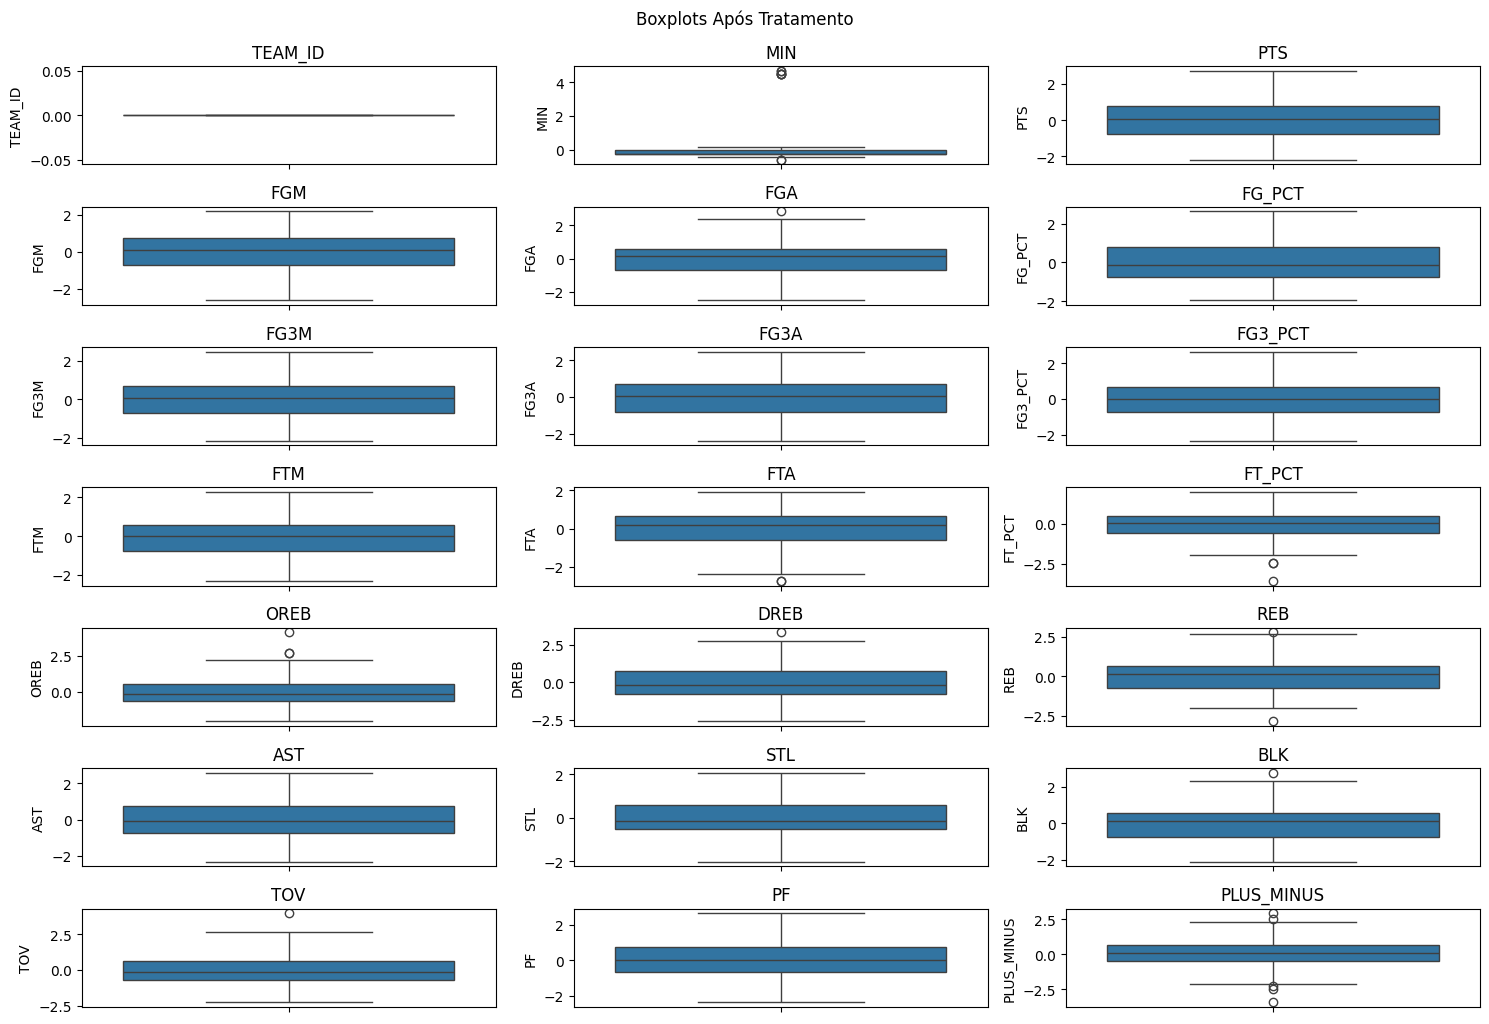

In [102]:
# Boxplots
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for the subplots
num_cols = 3  # Number of columns
num_rows = int(np.ceil(len(numeric_columns) / num_cols)) # Number of rows calculated dynamically


for i, column in enumerate(numeric_columns):
    # Adjust the subplot layout to accommodate all numeric columns
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=jogos_hornets, y=column)
    plt.title(column)

plt.tight_layout()
plt.suptitle("Boxplots Após Tratamento", y=1.02)
plt.show()

In [103]:
# Excluir colunas que não são importantes para o modelo de previsão
columns_to_drop = ["GAME_DATE", "GAME_ID", "TEAM_ID", "TEAM_NAME"]
jogos_hornets = jogos_hornets.drop(columns=columns_to_drop, errors="ignore")

In [104]:
# 1. Converter dados qualitativos para quantitativos
from sklearn.preprocessing import LabelEncoder, StandardScaler

qualitative_columns = jogos_hornets.select_dtypes(include=["object"]).columns  # Identificar colunas categóricas
label_encoders = {}
for column in qualitative_columns:
    le = LabelEncoder()
    jogos_hornets[column] = le.fit_transform(jogos_hornets[column])
    label_encoders[column] = le

In [105]:
# 3. Verificar a transformação
print("Dados transformados:")
print(jogos_hornets.head())

Dados transformados:
     SEASON_ID  TEAM_ABBREVIATION  MATCHUP  WL       MIN       PTS       FGM  \
193          2                  0        4   1 -0.045188  1.137072  1.344855   
233          2                  0        2   0 -0.234414 -0.790524 -1.578608   
265          2                  0        0   1 -0.045188  0.698982  0.091943   
284          2                  0       34   0 -0.234414 -0.264816 -0.116876   
320          2                  0       48   0 -0.045188  0.961836  1.136036   

          FGA    FG_PCT      FG3M  ...    FT_PCT      OREB      DREB  \
193  0.446711  0.982152  1.500352  ...  0.374429 -0.155364  0.916228   
233 -1.841359 -0.526871  0.530281  ...  0.787676 -1.574822 -0.576472   
265 -1.350005  1.000117  0.287764  ...  1.605185 -1.338245 -0.763060   
284  0.164160 -0.221474 -0.682307  ... -0.128653 -0.628516 -0.203297   
320 -0.722781  1.646841  1.015317  ...  0.086953 -0.865093 -0.576472   

          REB       AST       STL       BLK       TOV        PF  

In [106]:
# 4. (Opcional) Salvar o dataset transformado
# jogos_hornets.to_csv("charlotte_hornets_games_transformed.csv", index=False)

In [107]:
#RF1
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

# Definição das conferências
eastern_conference_teams = {
    "ATL", "BOS", "BKN", "CHA", "CHI", "CLE", "DET", "IND", "MIA", "MIL",
    "NYK", "ORL", "PHI", "TOR", "WAS"
}

western_conference_teams = {
    "DAL", "DEN", "GSW", "HOU", "LAC", "LAL", "MEM", "MIN", "NOP", "OKC",
    "PHX", "POR", "SAC", "SAS", "UTA"
}

# Função para listar todos os times agrupados por conferência
def get_teams_by_conference():
    nba_teams = teams.get_teams()
    
    # Criando listas para armazenar os times organizados por conferência
    eastern_conference = [
        {"ID": team["id"], "Nome": team["full_name"], "Sigla": team["abbreviation"], "Conferência": "Leste"}
        for team in nba_teams if team["abbreviation"] in eastern_conference_teams
    ]

    western_conference = [
        {"ID": team["id"], "Nome": team["full_name"], "Sigla": team["abbreviation"], "Conferência": "Oeste"}
        for team in nba_teams if team["abbreviation"] in western_conference_teams
    ]
    
    return eastern_conference, western_conference

In [108]:
# Função para buscar jogos por temporada
def get_games_by_season(season):
    try:
        gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
        games = gamefinder.get_data_frames()[0]
        return games
    except Exception as e:
        print(f"Erro ao buscar jogos da temporada {season}: {e}")
        return pd.DataFrame()  # Retorna um DataFrame vazio se houver erro

# Listar os times da NBA por conferência
eastern, western = get_teams_by_conference()

# 🔹 Exibir os times da Conferência Leste
print("\n **Times da Conferência Leste:**")
for team in sorted(eastern, key=lambda t: t["Nome"]):
    print(f"{team['Nome']} ({team['Sigla']}) - ID: {team['ID']}")

# 🔹 Exibir os times da Conferência Oeste
print("\n **Times da Conferência Oeste:**")
for team in sorted(western, key=lambda t: t["Nome"]):
    print(f"{team['Nome']} ({team['Sigla']}) - ID: {team['ID']}")

# 🔹 Buscar dados dos jogos das temporadas 2023-24 e 2024-25
games_2023_24 = get_games_by_season("2023-24")
games_2024_25 = get_games_by_season("2024-25")

# 🔹 Exibir os primeiros jogos disponíveis para cada temporada
# if not games_2023_24.empty:
#     print("\n **Jogos da temporada 2023-24:**")
#     print(games_2023_24.head())

# if not games_2024_25.empty:
#     print("\n **Jogos da temporada 2024-25:**")
#     print(games_2024_25.head())



 **Times da Conferência Leste:**
Atlanta Hawks (ATL) - ID: 1610612737
Boston Celtics (BOS) - ID: 1610612738
Brooklyn Nets (BKN) - ID: 1610612751
Charlotte Hornets (CHA) - ID: 1610612766
Chicago Bulls (CHI) - ID: 1610612741
Cleveland Cavaliers (CLE) - ID: 1610612739
Detroit Pistons (DET) - ID: 1610612765
Indiana Pacers (IND) - ID: 1610612754
Miami Heat (MIA) - ID: 1610612748
Milwaukee Bucks (MIL) - ID: 1610612749
New York Knicks (NYK) - ID: 1610612752
Orlando Magic (ORL) - ID: 1610612753
Philadelphia 76ers (PHI) - ID: 1610612755
Toronto Raptors (TOR) - ID: 1610612761
Washington Wizards (WAS) - ID: 1610612764

 **Times da Conferência Oeste:**
Dallas Mavericks (DAL) - ID: 1610612742
Denver Nuggets (DEN) - ID: 1610612743
Golden State Warriors (GSW) - ID: 1610612744
Houston Rockets (HOU) - ID: 1610612745
Los Angeles Clippers (LAC) - ID: 1610612746
Los Angeles Lakers (LAL) - ID: 1610612747
Memphis Grizzlies (MEM) - ID: 1610612763
Minnesota Timberwolves (MIN) - ID: 1610612750
New Orleans Pel

In [109]:
# RF2
from nba_api.stats.endpoints import leaguestandings
# Obter os dados de classificação
standings = leaguestandings.LeagueStandings()
standings_df = standings.get_data_frames()[0]

# Exibir as primeiras linhas e os nomes das colunas
print(standings_df.head())  # Mostra os primeiros registros
# print(standings_df.columns)  # Lista todas as colunas disponíveis

  LeagueID SeasonID      TeamID       TeamCity   TeamName Conference  \
0       00    22024  1610612739      Cleveland  Cavaliers       East   
1       00    22024  1610612760  Oklahoma City    Thunder       West   
2       00    22024  1610612738         Boston    Celtics       East   
3       00    22024  1610612745        Houston    Rockets       West   
4       00    22024  1610612752       New York     Knicks       East   

  ConferenceRecord  PlayoffRank ClinchIndicator   Division  ...   May   Jun  \
0            24-6             1                    Central  ...  None  None   
1            21-7             1                  Northwest  ...  None  None   
2            23-9             2                   Atlantic  ...  None  None   
3            19-9             2                  Southwest  ...  None  None   
4            22-10            3                   Atlantic  ...  None  None   

    Jul   Aug   Sep  Oct   Nov   Dec  PreAS PostAS  
0  None  None  None  5-0  12-3  12-1   

In [110]:
# Função para buscar jogos por temporada
def get_games_by_season(season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    return games

# Função para calcular a posição atual
def calculate_standings(games):
    # Filtrar jogos já realizados
    games_played = games[games['WL'].notnull()]
    
    # Calcular vitórias e derrotas
    standings = games_played.groupby('TEAM_ABBREVIATION').agg(
        Wins=('WL', lambda x: (x == 'W').sum()),
        Losses=('WL', lambda x: (x == 'L').sum())
    )
    
    # Adicionar a taxa de vitória (Win Percentage)
    standings['Win_Percentage'] = standings['Wins'] / (standings['Wins'] + standings['Losses'])
    
    # Ordenar por taxa de vitória
    standings = standings.sort_values(by='Win_Percentage', ascending=False).reset_index()
    return standings

# Função para exibir standings agrupados por conferência
def display_standings_by_conference(standings):
    eastern_standings = standings[standings['TEAM_ABBREVIATION'].isin(eastern_conference_teams)]
    western_standings = standings[standings['TEAM_ABBREVIATION'].isin(western_conference_teams)]

    print("\nEastern Conference Standings:")
    print(eastern_standings[['TEAM_ABBREVIATION', 'Wins', 'Losses', 'Win_Percentage']].to_string(index=False))

    print("\nWestern Conference Standings:")
    print(western_standings[['TEAM_ABBREVIATION', 'Wins', 'Losses', 'Win_Percentage']].to_string(index=False))

In [111]:
# Obter dados dos jogos da temporada atual (2024-25)
games_2024_25 = get_games_by_season("2024-25")

# Calcular a classificação
current_standings = calculate_standings(games_2024_25)

# Exibir a classificação agrupada por conferência
display_standings_by_conference(current_standings)


Eastern Conference Standings:
TEAM_ABBREVIATION  Wins  Losses  Win_Percentage
              CLE    37      13        0.740000
              BOS    36      16        0.692308
              NYK    35      17        0.673077
              MIL    28      21        0.571429
              IND    27      22        0.551020
              MIA    27      23        0.540000
              DET    26      25        0.509804
              ORL    25      26        0.490196
              ATL    23      27        0.460000
              CHI    23      29        0.442308
              PHI    20      30        0.400000
              TOR    17      34        0.333333
              BKN    15      36        0.294118
              CHA    14      34        0.291667
              WAS     8      42        0.160000

Western Conference Standings:
TEAM_ABBREVIATION  Wins  Losses  Win_Percentage
              OKC    41      10        0.803922
              HOU    34      15        0.693878
              MEM    34   

In [112]:
# RF3
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular os totais de vitórias e derrotas
def calculate_team_totals(team_games):
    # Verificar vitórias e derrotas em casa e fora
    team_games['Home/Away'] = team_games['MATCHUP'].apply(lambda x: 'Home' if 'vs.' in x else 'Away')

    totals = {
        "Total Wins": (team_games['WL'] == 'W').sum(),
        "Total Home Wins": ((team_games['WL'] == 'W') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Wins": ((team_games['WL'] == 'W') & (team_games['Home/Away'] == 'Away')).sum(),
        "Total Losses": (team_games['WL'] == 'L').sum(),
        "Total Home Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Away')).sum(),
    }
    return totals

In [113]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular os totais
team_totals = calculate_team_totals(all_games)

In [114]:
# Exibir os resultados
print("Charlotte Hornets - Totais nas Temporadas 2023-24 e 2024-25:")
for key, value in team_totals.items():
    print(f"{key}: {value}")

Charlotte Hornets - Totais nas Temporadas 2023-24 e 2024-25:
Total Wins: 36
Total Home Wins: 21
Total Away Wins: 15
Total Losses: 98
Total Home Losses: 47
Total Away Losses: 51


In [115]:
# RF4

# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular os totais e médias por jogo
def calculate_team_stats(team_games):
    # Verificar jogos em casa e fora
    team_games['Home/Away'] = team_games['MATCHUP'].apply(lambda x: 'Home' if 'vs.' in x else 'Away')
    
    # Calcular estatísticas
    stats = {
        "Total Points per Game": team_games['PTS'].mean(),
        "Total Assists per Game": team_games['AST'].mean(),
        "Total Rebounds per Game": team_games['REB'].mean(),
        "Total 3-Point Field Goals Made": team_games['FG3M'].sum(),
        "Total Home Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Away')).sum()
    }
    return stats

In [116]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular as estatísticas
team_stats = calculate_team_stats(all_games)


In [117]:
# Exibir os resultados
print("Charlotte Hornets - Estatísticas Totais nas Temporadas 2023-24 e 2024-25:")
for key, value in team_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

Charlotte Hornets - Estatísticas Totais nas Temporadas 2023-24 e 2024-25:
Total Points per Game: 107.02
Total Assists per Game: 24.42
Total Rebounds per Game: 42.75
Total 3-Point Field Goals Made: 1717
Total Home Losses: 47
Total Away Losses: 51


In [118]:
# RF5
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular a divisão de dados
def calculate_rebounds_and_scoring(team_games):
    # Calcular totais
    totals = {
        "Total Rebounds": team_games['REB'].sum(),
        "Total Offensive Rebounds": team_games['OREB'].sum(),
        "Total Defensive Rebounds": team_games['DREB'].sum(),
        "Total Points": team_games['PTS'].sum(),
        "Total 2-Point Field Goals Made": (team_games['FGM'] - team_games['FG3M']).sum(),
        "Total 3-Point Field Goals Made": team_games['FG3M'].sum(),
        "Total Free Throws Made": team_games['FTM'].sum()
    }
    return totals

In [119]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular os totais
rebounds_and_scoring_totals = calculate_rebounds_and_scoring(all_games)


In [120]:
# Exibir os resultados
print("Charlotte Hornets - Totais de Rebotes e Pontuações (Temporadas 2023-24 e 2024-25):")
for key, value in rebounds_and_scoring_totals.items():
    print(f"{key}: {value}")

Charlotte Hornets - Totais de Rebotes e Pontuações (Temporadas 2023-24 e 2024-25):
Total Rebounds: 5728
Total Offensive Rebounds: 1428
Total Defensive Rebounds: 4300
Total Points: 14341
Total 2-Point Field Goals Made: 3584
Total 3-Point Field Goals Made: 1717
Total Free Throws Made: 2022


In [121]:
# RF6
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular a performance defensiva
def calculate_defensive_performance(team_games):
    # Calcular totais
    defensive_performance = {
        "Total Steals": team_games['STL'].sum(),
        "Total Defensive Rebounds": team_games['DREB'].sum(),
        "Total Blocks per Game": team_games['BLK'].mean(),
        "Total Turnovers per Game": team_games['TOV'].mean(),
        "Total Personal Fouls per Game": team_games['PF'].mean()
    }
    return defensive_performance


In [122]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular a performance defensiva
defensive_performance_totals = calculate_defensive_performance(all_games)


In [123]:
# Exibir os resultados
print("Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):")
for key, value in defensive_performance_totals.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):
Total Steals: 993
Total Defensive Rebounds: 4300
Total Blocks per Game: 4.75
Total Turnovers per Game: 14.13
Total Personal Fouls per Game: 18.87


In [124]:
# RF7
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para formatar e exibir os jogos com as informações solicitadas
def display_team_games(team_games):
    team_games['GAME_DATE'] = pd.to_datetime(team_games['GAME_DATE'])
    
    # Calcular o adversário
    team_games['OPPONENT'] = team_games['MATCHUP'].apply(lambda x: x.split(' ')[2] if len(x.split(' ')) > 2 else x.split(' ')[0])
    
    # Determinar se foi casa ou fora
    team_games['LOCATION'] = team_games['MATCHUP'].apply(lambda x: 'Casa' if 'vs' in x else 'Fora')
    
    # Calcular vitória ou derrota
    team_games['RESULT'] = team_games['WL'].apply(lambda x: 'Vitória' if x == 'W' else 'Derrota')
    
    # Selecionar as colunas relevantes
    relevant_columns = ['GAME_DATE', 'OPPONENT', 'RESULT', 'LOCATION', 'PTS']
    team_games = team_games[relevant_columns]
    
    # Exibir as informações
    return team_games

In [125]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Exibir os jogos formatados
team_games_display = display_team_games(all_games)
print(team_games_display)


      GAME_DATE OPPONENT   RESULT LOCATION  PTS
193  2024-04-14      CLE  Vitória     Fora  120
233  2024-04-12      BOS  Derrota     Fora   98
265  2024-04-10      ATL  Vitória     Fora  115
284  2024-04-09      DAL  Derrota     Casa  104
320  2024-04-07      OKC  Derrota     Casa  118
...         ...      ...      ...      ...  ...
2264 2024-10-17      IND  Derrota     Fora  116
2295 2024-10-15      NYK  Derrota     Fora  105
2339 2024-10-10      MEM  Vitória     Fora  119
2358 2024-10-08      MIA  Vitória     Casa  111
2373 2024-10-06      NYK  Derrota     Casa  109

[134 rows x 5 columns]


In [126]:
team_games_display

,GAME_DATE,OPPONENT,RESULT,LOCATION,PTS
193,2024-04-14,CLE,Vitória,Fora,120
233,2024-04-12,BOS,Derrota,Fora,98
265,2024-04-10,ATL,Vitória,Fora,115
284,2024-04-09,DAL,Derrota,Casa,104
320,2024-04-07,OKC,Derrota,Casa,118
...,...,...,...,...,...
2264,2024-10-17,IND,Derrota,Fora,116
2295,2024-10-15,NYK,Derrota,Fora,105
2339,2024-10-10,MEM,Vitória,Fora,119
2358,2024-10-08,MIA,Vitória,Casa,111


### RF8

In [127]:

# Configuração do time Charlotte Hornets
TEAM_ID = 1610612766  # ID do Charlotte Hornets

# Função para obter os jogos de uma temporada
def get_team_games(team_id, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    return games

# Obtendo os jogos das temporadas 23-24 e 24-25
games_23_24 = get_team_games(TEAM_ID, "2023-24")
games_24_25 = get_team_games(TEAM_ID, "2024-25")

# Concatenar os dados das duas temporadas
games = pd.concat([games_23_24, games_24_25], ignore_index=True)

# Processamento dos dados
games["Home"] = games["MATCHUP"].apply(lambda x: "Home" if "vs." in x else "Away")
games["Win"] = games["WL"].apply(lambda x: 1 if x == "W" else 0)
games["Loss"] = games["WL"].apply(lambda x: 1 if x == "L" else 0)
games["Points_Scored"] = games["PTS"]
games["Points_Allowed"] = games["PTS"] - games["PLUS_MINUS"]

# Estatísticas para gráficos
wins = games["Win"].sum()
losses = games["Loss"].sum()
wins_home = games[games["Home"] == "Home"]["Win"].sum()
wins_away = games[games["Home"] == "Away"]["Win"].sum()
losses_home = games[games["Home"] == "Home"]["Loss"].sum()
losses_away = games[games["Home"] == "Away"]["Loss"].sum()


In [128]:
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,STL,BLK,TOV,PF,PLUS_MINUS,Home,Win,Loss,Points_Scored,Points_Allowed
0,22023,1610612766,CHA,Charlotte Hornets,0022301187,2024-04-14,CHA @ CLE,W,241,120,...,10,9,9,11,10.0,Away,1,0,120,110.0
1,22023,1610612766,CHA,Charlotte Hornets,0022301173,2024-04-12,CHA @ BOS,L,240,98,...,3,7,19,15,-33.0,Away,0,1,98,131.0
2,22023,1610612766,CHA,Charlotte Hornets,0022301159,2024-04-10,CHA @ ATL,W,241,115,...,11,2,13,18,1.0,Away,1,0,115,114.0
3,22023,1610612766,CHA,Charlotte Hornets,0022301144,2024-04-09,CHA vs. DAL,L,240,104,...,8,3,11,16,-26.0,Home,0,1,104,130.0
4,22023,1610612766,CHA,Charlotte Hornets,0022301135,2024-04-07,CHA vs. OKC,L,241,118,...,12,9,18,14,-3.0,Home,0,1,118,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,12024,1610612766,CHA,Charlotte Hornets,0012400061,2024-10-17,CHA @ IND,L,266,116,...,11,8,32,30,-5.0,Away,0,1,116,121.0
130,12024,1610612766,CHA,Charlotte Hornets,0012400052,2024-10-15,CHA @ NYK,L,239,105,...,8,5,13,19,-6.0,Away,0,1,105,111.0
131,12024,1610612766,CHA,Charlotte Hornets,0012400027,2024-10-10,CHA @ MEM,W,238,119,...,9,6,21,21,25.0,Away,1,0,119,94.0
132,12024,1610612766,CHA,Charlotte Hornets,0012400015,2024-10-08,CHA vs. MIA,W,241,111,...,7,7,21,21,3.0,Home,1,0,111,108.0


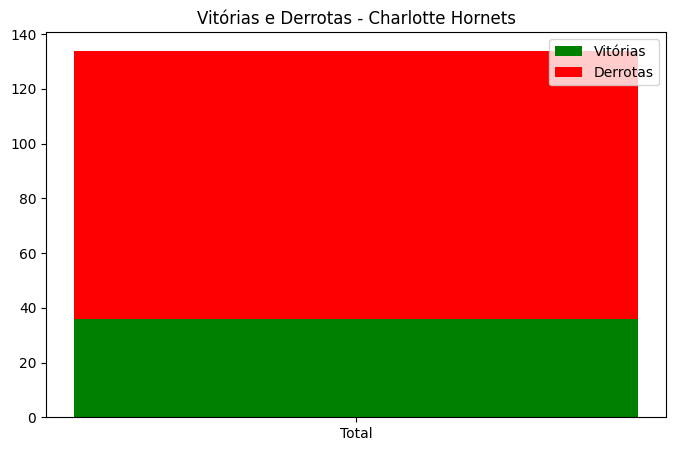

In [129]:
# Gráfico 1: Barras Empilhadas de Vitórias e Derrotas
plt.figure(figsize=(8, 5))
plt.bar(["Total"], [wins], color="green", label="Vitórias")
plt.bar(["Total"], [losses], bottom=[wins], color="red", label="Derrotas")
plt.title("Vitórias e Derrotas - Charlotte Hornets")
plt.legend()
plt.show()


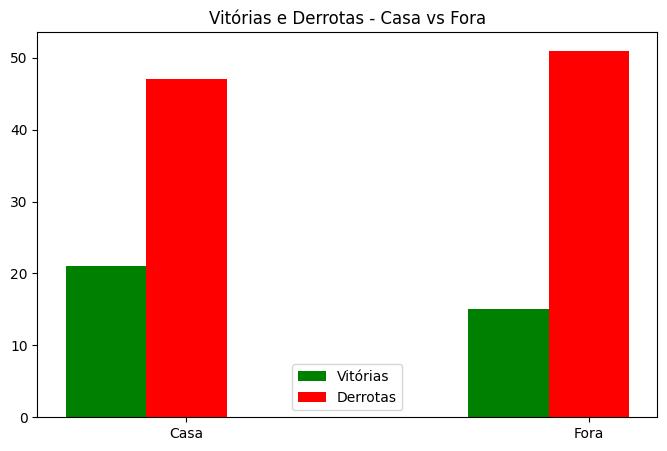

In [130]:
# Gráfico 2: Barras Agrupadas (Vitórias e Derrotas em Casa/Fora)
labels = ["Casa", "Fora"]
values = [[wins_home, wins_away], [losses_home, losses_away]]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width, values[0], width, label="Vitórias", color="green")
ax.bar(x, values[1], width, label="Derrotas", color="red")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Vitórias e Derrotas - Casa vs Fora")
ax.legend()
plt.show()


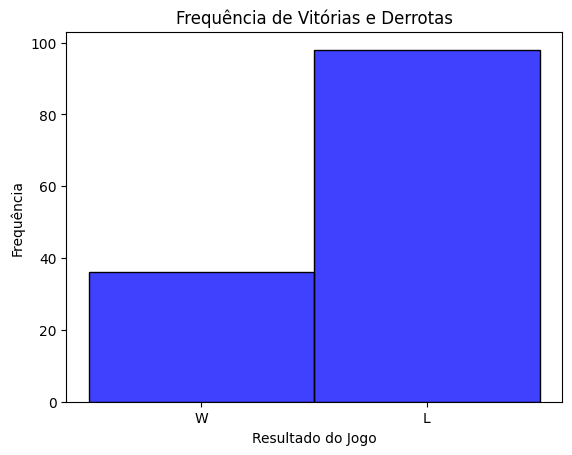

In [131]:
# Gráfico 3: Histograma de Vitórias e Derrotas
sns.histplot(games["WL"], bins=2, color="blue", kde=False)
plt.title("Frequência de Vitórias e Derrotas")
plt.xlabel("Resultado do Jogo")
plt.ylabel("Frequência")
plt.show()


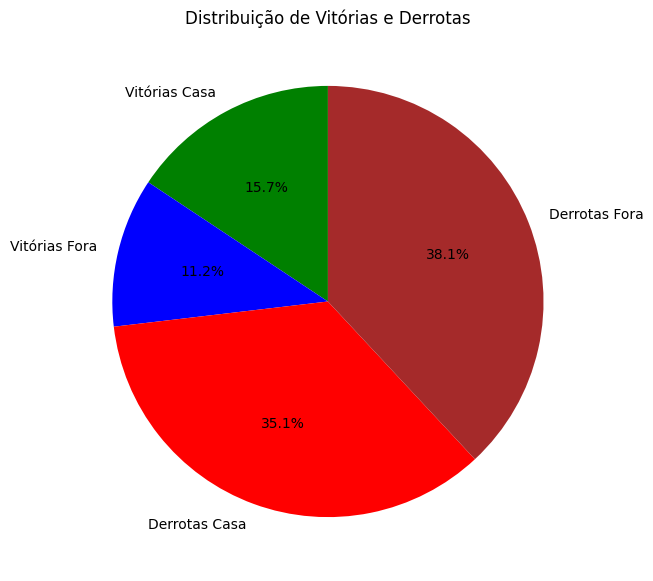

In [132]:
# Gráfico 4: Gráfico de Pizza
sizes = [wins_home, wins_away, losses_home, losses_away]
labels = ["Vitórias Casa", "Vitórias Fora", "Derrotas Casa", "Derrotas Fora"]
colors = ["green", "blue", "red", "brown"]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Distribuição de Vitórias e Derrotas")
plt.show()

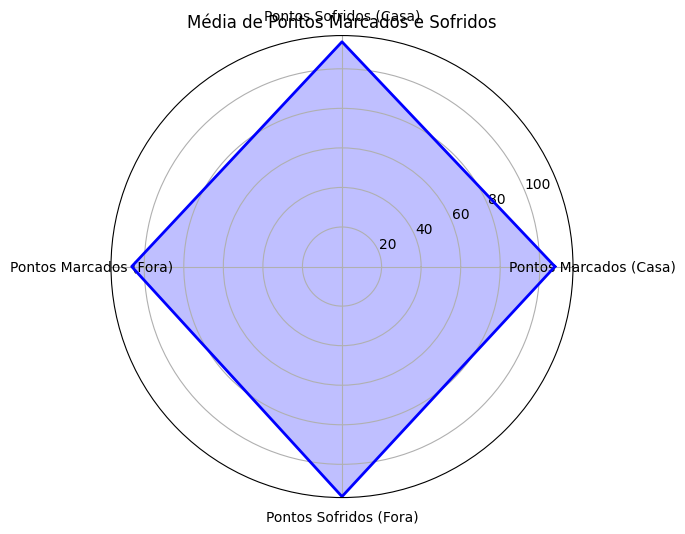

In [133]:
# Gráfico 5: Radar (Média de Pontos Marcados/Sofridos)
stats = [
    games[games["Home"] == "Home"]["Points_Scored"].mean(),
    games[games["Home"] == "Home"]["Points_Allowed"].mean(),
    games[games["Home"] == "Away"]["Points_Scored"].mean(),
    games[games["Home"] == "Away"]["Points_Allowed"].mean()
]

labels = ["Pontos Marcados (Casa)", "Pontos Sofridos (Casa)", "Pontos Marcados (Fora)", "Pontos Sofridos (Fora)"]

angles = np.linspace(0, 2 * np.pi, len(stats), endpoint=False).tolist()
stats += stats[:1]  # Fechar gráfico
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "polar"})
ax.fill(angles, stats, color="blue", alpha=0.25)
ax.plot(angles, stats, color="blue", linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Média de Pontos Marcados e Sofridos")
plt.show()

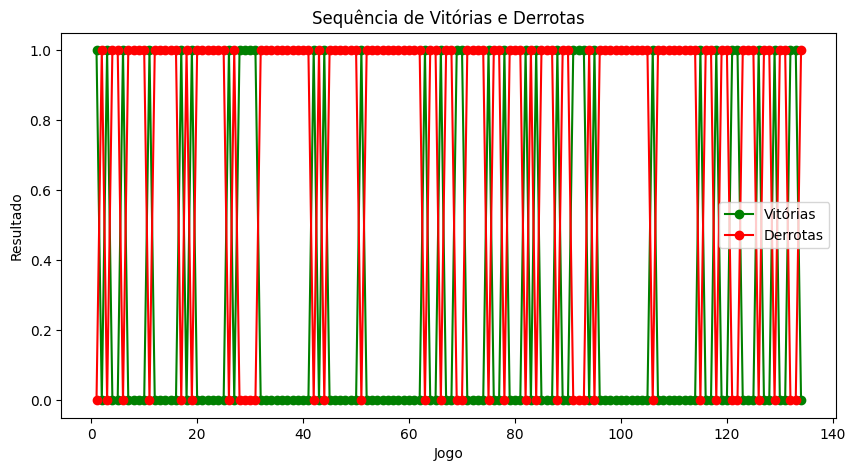

In [134]:
# Gráfico 6: Gráfico de Linhas (Sequência de Vitórias e Derrotas)
games["Game_Number"] = range(1, len(games) + 1)
plt.figure(figsize=(10, 5))
plt.plot(games["Game_Number"], games["Win"], marker="o", linestyle="-", color="green", label="Vitórias")
plt.plot(games["Game_Number"], games["Loss"], marker="o", linestyle="-", color="red", label="Derrotas")
plt.title("Sequência de Vitórias e Derrotas")
plt.xlabel("Jogo")
plt.ylabel("Resultado")
plt.legend()
plt.show()


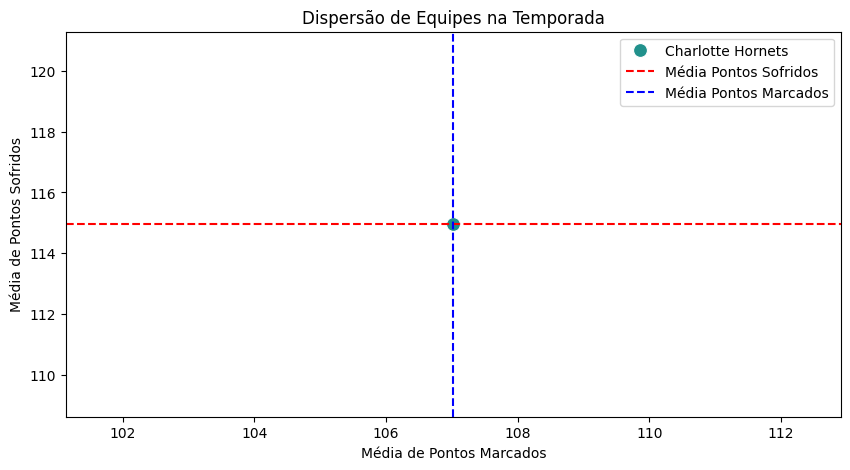

In [135]:
# Gráfico 7: Gráfico de Dispersão (Média de Pontos por Equipe)
team_avg_points = games.groupby("TEAM_NAME")[["Points_Scored", "Points_Allowed"]].mean()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=team_avg_points["Points_Scored"], y=team_avg_points["Points_Allowed"], hue=team_avg_points.index, palette="viridis", s=100)
plt.axhline(games["Points_Allowed"].mean(), color="r", linestyle="--", label="Média Pontos Sofridos")
plt.axvline(games["Points_Scored"].mean(), color="b", linestyle="--", label="Média Pontos Marcados")
plt.xlabel("Média de Pontos Marcados")
plt.ylabel("Média de Pontos Sofridos")
plt.title("Dispersão de Equipes na Temporada")
plt.legend()
plt.show()

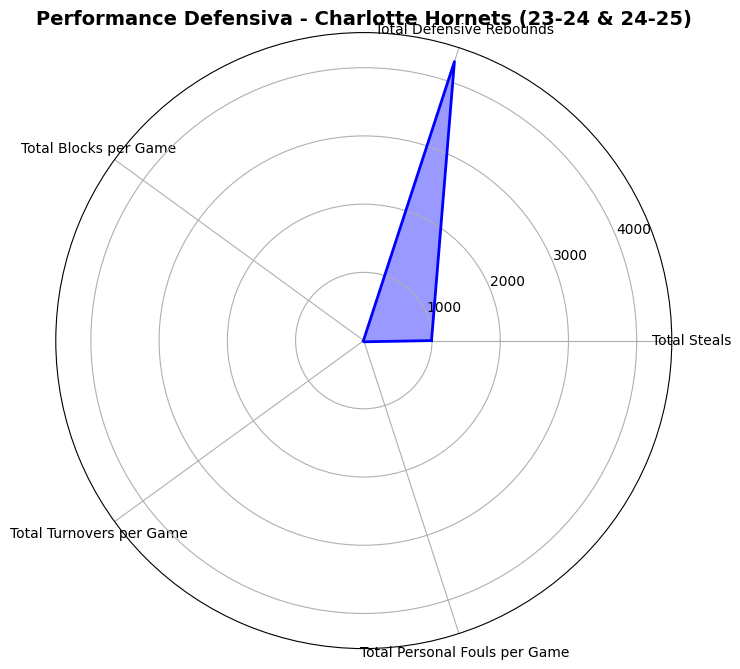

In [136]:
# Dados extraídos da performance defensiva
categories = list(defensive_performance_totals.keys())
values = list(defensive_performance_totals.values())

# Criar ângulos para cada categoria
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Fechar o gráfico
values += values[:1]
angles += angles[:1]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.fill(angles, values, color='blue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)

# Configuração dos rótulos
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# Título do gráfico
plt.title('Performance Defensiva - Charlotte Hornets (23-24 & 24-25)', fontsize=14, fontweight='bold')

# Exibir o gráfico
plt.show()

Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):
Total Steals: 993
Total Defensive Rebounds: 4300
Total Blocks per Game: 4.75
Total Turnovers per Game: 14.13
Total Personal Fouls per Game: 18.87


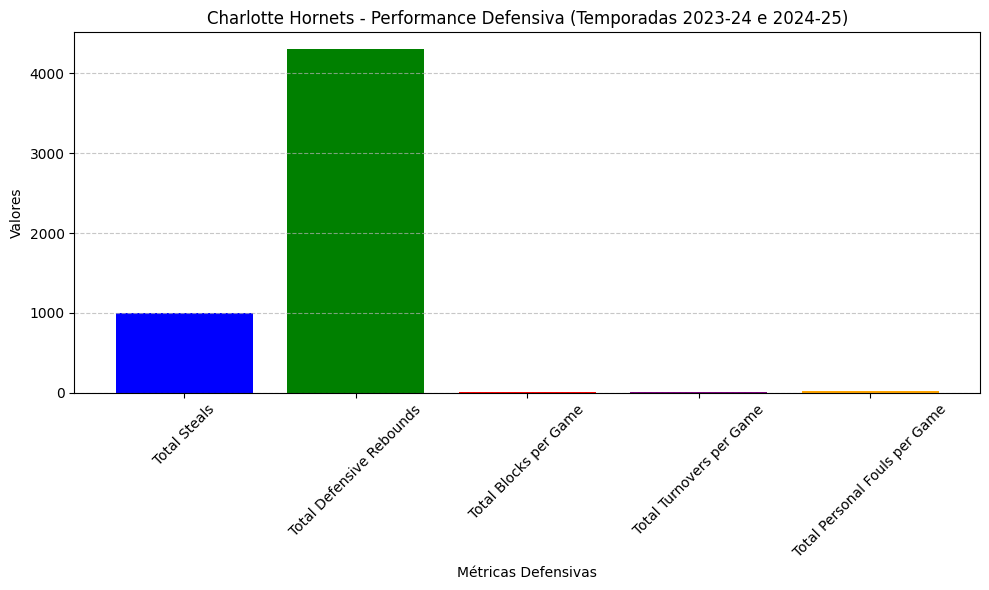

In [137]:
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular a performance defensiva
def calculate_defensive_performance(team_games):
    # Calcular totais
    defensive_performance = {
        "Total Steals": team_games['STL'].sum(),
        "Total Defensive Rebounds": team_games['DREB'].sum(),
        "Total Blocks per Game": team_games['BLK'].mean(),
        "Total Turnovers per Game": team_games['TOV'].mean(),
        "Total Personal Fouls per Game": team_games['PF'].mean()
    }
    return defensive_performance

# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular a performance defensiva
defensive_performance_totals = calculate_defensive_performance(all_games)

# Exibir os resultados
print("Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):")
for key, value in defensive_performance_totals.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

# Criar gráfico de barras
metrics = list(defensive_performance_totals.keys())
values = list(defensive_performance_totals.values())

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25)')
plt.xlabel('Métricas Defensivas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

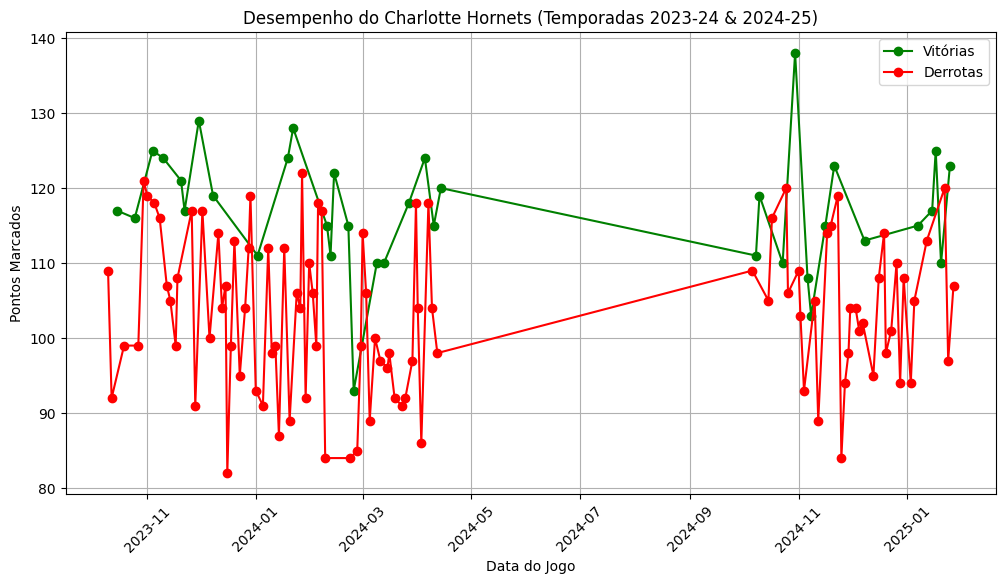

In [138]:
# Converter a coluna GAME_DATE para datetime caso não tenha sido feita antes
team_games_display['GAME_DATE'] = pd.to_datetime(team_games_display['GAME_DATE'])

# Ordenar os jogos por data
team_games_display = team_games_display.sort_values(by='GAME_DATE')

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Separar jogos vencidos e perdidos
wins = team_games_display[team_games_display['RESULT'] == 'Vitória']
losses = team_games_display[team_games_display['RESULT'] == 'Derrota']

# Plotar vitórias com linha verde
plt.plot(wins['GAME_DATE'], wins['PTS'], marker='o', linestyle='-', color='green', label="Vitórias")

# Plotar derrotas com linha vermelha
plt.plot(losses['GAME_DATE'], losses['PTS'], marker='o', linestyle='-', color='red', label="Derrotas")

# Ajustes do gráfico
plt.xlabel('Data do Jogo')
plt.ylabel('Pontos Marcados')
plt.title('Desempenho do Charlotte Hornets (Temporadas 2023-24 & 2024-25)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()
